# Homework 3
## Juan Francisco Cisneros

In [226]:
from time import time
#https://www.geeksforgeeks.org/timing-functions-with-decorators-python/ <- IMPLEMENTATION FROM, RE WRITTED BY JUAN FRANCISCO CISNEROS
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()*10**12
        t2 = time()*10**12
        result = func(*args, **kwargs)
        return t2-t1,result
    return wrap_func

### 1. Merge two sorted lists

1. Assume you have two sorted linked lists. Use **recursion** to merge these lists and return a new sorted list. 

For example:

- Input: 

> L1 = 1 -> 3 -> 5 -> 7 -> null

> L2 = 2 -> 4 -> 6 -> null

- Output:

> L4 = 1 -> 2 -> 3-> 4 -> 5 -> 6 -> 7 -> null

2. Calculate complexity

In [227]:
import ctypes
import math
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None): #CONSTANT
        self.val = val
        self.next_node = None

    def set_next_node(self, next_node): #CONSTANT
        self.next_node = next_node


In [228]:
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None): #CONSTANT
        self.head_node = head_node

    def list_traversed(self):
        node = self.head_node
        while node:
            try:
                print(node.val)
                node = node.next_node
            except:
                print()

    def insert_head(self, new_node): #CONSTANT
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null
        new_node.set_next_node(self.head_node)
        self.head_node = new_node

    def insert_tail(self, new_node):
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null
        node = self.head_node
        prev = None
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)

    def insert_middle(self, new_node, value):
        # insert in the middle
        # A -> B -> C -> null
        # A -> B -> R -> C -> null
        node = self.head_node
        while node.val != value:
            node = node.next_node
        if node:
            new_node.set_next_node(node.next_node)
            node.set_next_node(new_node)
        else:
            self.insert_tail(new_node)

    def delete(self,value): #O(n)
        node = self.head_node
        prev = None

        if node.val == value:
            self.head_node = self.head_node.next_node
            node.set_next_node(None)
            return node.val


        while node and node.val != value:
            prev = node
            if node.next_node != None:
                node = node.next_node
        if node:
            prev.set_next_node(node.next_node)
            node.set_next_node(None)
        else:
            raise ValueError('No value founded')

In [229]:
def mergeLists(list1,list2):
    def mergeRecursive( node1, node2):
        if (node1 == None):
            return node2
        if (node2 == None):
            return h1
        if (node1.val < node2.val):
            node1.next_node = mergeRecursive(node1.next_node, node2)
            return node1
        else:
            node2.next_node = mergeRecursive(node1, node2.next_node)
            return node2
    return Singly_linked_list(mergeRecursive(list1.head_node,list2.head_node))

In [230]:
l1 = Singly_linked_list(Node(0))
l1.insert_tail(Node(2))
l1.insert_tail(Node(4))
l1.insert_tail(Node(6))
l1.insert_tail(Node(10))
l1.list_traversed()

0
2
4
6
10


In [231]:
l2 = Singly_linked_list(Node(1))
l2.insert_tail(Node(3))
l2.insert_tail(Node(5))
l2.insert_tail(Node(7))
l2.insert_tail(Node(8))
l2.insert_tail(Node(9))
l2.insert_tail(Node(11))
l2.list_traversed()

1
3
5
7
8
9
11


In [232]:
l = mergeLists(l1,l2)

In [233]:
l.list_traversed()

0
1
2
3
4
5
6
7
8
9
10
11


### 2. Implement quick sort

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class. 
2. Use a couple of parragraphs to explain the steps of divide and conquer:
    - how/where do you divide?
    - where/what do you conquer?
    - how/what do you combine?
3. Analyze complexity

In [234]:
def sorting(array):

    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)

        return sorting(less)+equal+sorting(greater)

    else:
        return array

In [235]:
array = [1, 4, 2, 6, 3, 7, 5, 8]
print(sorting(array))

[1, 2, 3, 4, 5, 6, 7, 8]


### 3. Compare quick sort and merge sort

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

In [236]:
import random
import numpy as np

In [237]:
arrays = []
for i in range(0,1000):
    array = np.random.permutation(10000)
    arrays.append(array)
    print(arrays[i])

[6728 5423 1186 ... 9481  265 6870]
[9604  306 3025 ... 5263 8323 1788]
[7472 4224 4642 ... 2519 6728 7849]
[9481 5774 8451 ... 1368 9272 9059]
[3358 8848 3111 ...  375 2907 1791]
[ 399 9090 3632 ... 9480 5284 3086]
[5334 5600 7661 ... 8596 9747 6615]
[7808 5680 8245 ... 6969 4516 1173]
[2162 7736 5535 ... 5705 1368 9678]
[ 456   48 3832 ...  253 6973 4180]
[1469 2740 2126 ... 3975 7349 4758]
[7688 6726 1691 ... 4766 7128 5113]
[8646 3406 2830 ... 6287 2815 5950]
[7312 5650 8765 ... 1721  951 8652]
[4262 5833 6002 ... 1865 1643 5830]
[1319  691 2519 ... 3170 9072 1181]
[8486 8087 7907 ...  508 8500 6774]
[ 510 3663 5962 ... 8741 1784 7804]
[9638 3352 5108 ... 3057 8990 7698]
[5769 4422 9832 ... 1115 7621 8605]
[2338 8947 7074 ... 1515 7886 4526]
[5295 2708 1910 ... 8725 7919  638]
[1040 5056 9947 ... 9899 8828 3610]
[ 382 8773 7829 ... 7894 6855 6606]
[ 159 6284 2251 ... 2185 5349 3001]
[3074 1494 5866 ... 5767 6422 3863]
[7133 3357 5907 ... 2083 5222 1535]
[ 877 3734 9215 ... 4589 824

In [238]:
from time import time
#https://www.geeksforgeeks.org/timing-functions-with-decorators-python/ <- IMPLEMENTATION FROM, RE WRITTED BY JUAN FRANCISCO CISNEROS
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()*10**12
        t2 = time()*10**12
        return t2-t1
    return wrap_func

### LETS USE THE MERGE SORT ALGORITHM FROM THE PREVIOUS CLASS

In [239]:
@timer_func
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])
    right = merge_sort(nums[pivot:])
    return merge(left, right)


def merge(left, right):
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1

    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])

    return sorted_list

In [240]:
merge_sortTime = []
for i in range(0,1000):
    merge_sortTime.append(merge_sort(arrays[i]))
    print(merge_sortTime[i])

2097152.0
1310720.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
1310720.0
20185088.0
0.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
1310720.0
0.0
0.0
0.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
0.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
1310720.0
0.0
1048576.0
0.0
0.0
1310720.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
524288.0
0.0
1048576.0
0.0
786432.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
1048576.0
0.0
0.0
0.0
0.0
786432.0
0.0
1048576.0
0.0
0.0
0.0
1048576.0
0.0
786432.0
0.0
0.0
1048576.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
1048576.0
0.0
0.0
1048576.0
0.0
0.0
0.0
786432.0
0.0
0.0
0.0
0.0
0.0
1310720.0
0.0
786432.0
0.0
1048576.0
0.0
1048576.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432

### LETS USE THE QUICK SORT ALGORITHM FROM THE PREVIOUS EXERCISE

In [241]:
@timer_func
def sorting(array):

    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)

        return sorting(less)+equal+sorting(greater)

    else:
        return array

In [242]:
quick_sortTime = []
for i in range(0,1000):
    quick_sortTime.append(sorting(arrays[i]))
    print(quick_sortTime[i])

786432.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
1048576.0
0.0
0.0
786432.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
1048576.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
786432.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
1048576.0
0.0
0.0
0.0
0.0
1310720.0
1048576.0
0.0
0.0
0.0
1048576.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
786432.0
0.0
0.0
0.0
0.0
1310720.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
1048576.0
0.0
0.0
0.0
0.0
786432.0
1048576.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
1048576.0
0.0
0.0
0.0
1048576.0
786432.0
0.0
1048576.0
786432.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1048576.0
0.0
1048576.0
0.0
524288.0
1310720.0
0.0
1048576.0
1048576.0
786432.0
0.0
0.0
0.0
0.0

In [243]:
import pandas as pd
df = pd.DataFrame(zip(merge_sortTime,quick_sortTime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Merge Sort','T(n) Quick Sort',]
df

,T(n) Merge Sort,T(n) Quick Sort
0,2097152.0,786432.0
1,1310720.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,1048576.0,0.0


<AxesSubplot: >

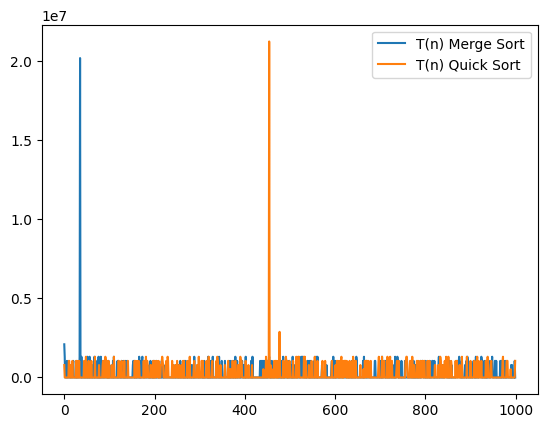

In [244]:
df.plot()

### 4. Implement factorials with recursion

Recall that a factorial number is defined as:

$k! = k \times (k-1) \times (k-2) \times ... \times 2 \times 1$

For example: $3! = 3 \times 2 \times 1 = 6$

1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it. 
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?
